In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load baseline data
glossary_results = pd.read_csv("results/glossary.csv", index_col=0)
rake_results = pd.read_csv("results/rake.csv", index_col=0)
tfidf_results = pd.read_csv("results/tfidf.csv", index_col=0)
supervised_results = pd.read_csv("results/supervised.csv", index_col=0)

# Replace 0s in glossary with NaN
glossary_results = glossary_results.replace(0, np.nan)
glossary_results = glossary_results.drop(columns=["iteration"])
glossary_results = glossary_results.dropna(axis=0, how="any")

# Load seedlist data
seedlist_results_custom = pd.read_csv("results/seedlist_custom_-1.csv", index_col=0)
seedlist_results_wikipedia = pd.read_csv("results/seedlist_wikipedia_100.csv", index_col=0)

# Load clustering data
clustering_results_dereko_wiki = pd.read_csv("results/clustering_dereko_wikipedia_all.csv", index_col=0)
clustering_results_subtlex_wiki = pd.read_csv("results/clustering_subtlex_wikipedia_all.csv", index_col=0)
clustering_results_dereko_custom = pd.read_csv("results/clustering_dereko_custom_all.csv", index_col=0)
clustering_results_subtlex_custom = pd.read_csv("results/clustering_subtlex_custom_all.csv", index_col=0)


In [3]:
glossary_macro_average_results = glossary_results.mean(axis=0, numeric_only=True, skipna=True)
supervised_macro_average_results = supervised_results.mean(axis=0, numeric_only=True)
tfidf_macro_average_results = tfidf_results.mean(axis=0, numeric_only=True)
rake_macro_average_results = rake_results.mean(axis=0, numeric_only=True)
seedlist_custom_macro_average_results = seedlist_results_custom.mean(axis=0, numeric_only=True)
seedlist_wikipedia_macro_average_results = seedlist_results_wikipedia.mean(axis=0, numeric_only=True)

clustering_dereko_wiki_macro_average_results = clustering_results_dereko_wiki.mean(axis=0, numeric_only=True)
clustering_subtlex_wiki_macro_average_results = clustering_results_subtlex_wiki.mean(axis=0, numeric_only=True)
clustering_results_dereko_custom_macro_average_results = clustering_results_dereko_custom.mean(axis=0, numeric_only=True)
clustering_results_subtlex_custom_macro_average_results = clustering_results_subtlex_custom.mean(axis=0, numeric_only=True)

glossary_macro_average_results = pd.DataFrame(glossary_macro_average_results).rename(columns={0: "Glossary"})
supervised_macro_average_results = pd.DataFrame(supervised_macro_average_results).rename(columns={0: "Supervised"})
tfidf_macro_average_results = pd.DataFrame(tfidf_macro_average_results).rename(columns={0: "Tf-Idf"})
rake_macro_average_results = pd.DataFrame(rake_macro_average_results).rename(columns={0: "RAKE"})
seedlist_custom_macro_average_results = pd.DataFrame(seedlist_custom_macro_average_results).rename(columns={0: "Seedlist (custom)"})
seedlist_wikipedia_macro_average_results = pd.DataFrame(seedlist_wikipedia_macro_average_results).rename(columns={0: "Seedlist (wikipedia)"})

clustering_dereko_wiki_macro_average_results = pd.DataFrame(clustering_dereko_wiki_macro_average_results).rename(columns={0: "Own (dereko, wikipedia)"})
clustering_subtlex_wiki_macro_average_results = pd.DataFrame(clustering_subtlex_wiki_macro_average_results).rename(columns={0: "Own (subtlex, wikipedia)"})
clustering_results_dereko_custom_macro_average_results = pd.DataFrame(
    clustering_results_dereko_custom_macro_average_results
).rename(columns={0: "Own (dereko, custom)"})
clustering_results_subtlex_custom_macro_average_results = pd.DataFrame(
    clustering_results_subtlex_custom_macro_average_results
).rename(columns={0: "Own (subtlex, custom)"})

macro_average_results = pd.concat(
    [
        glossary_macro_average_results,
        supervised_macro_average_results,
        tfidf_macro_average_results,
        rake_macro_average_results,
        seedlist_custom_macro_average_results,
        seedlist_wikipedia_macro_average_results,
        clustering_dereko_wiki_macro_average_results,
        clustering_subtlex_wiki_macro_average_results,
        clustering_results_dereko_custom_macro_average_results,
        clustering_results_subtlex_custom_macro_average_results,
    ],
    axis=1
)
macro_average_results = macro_average_results.T
macro_average_results = macro_average_results.drop(columns=["iteration"])
macro_average_results = macro_average_results.sort_index()


In [4]:
macro_average_results

,precision,recall,f1
Glossary,0.821098,0.258256,0.382310
"Own (dereko, custom)",0.472044,0.599569,0.519186
"Own (dereko, wikipedia)",0.543043,0.583772,0.545441
"Own (subtlex, custom)",0.388489,0.728722,0.503111
"Own (subtlex, wikipedia)",0.518322,0.645418,0.559141
RAKE,0.172281,0.854159,0.283306
Seedlist (custom),0.453999,0.428154,0.432570
Seedlist (wikipedia),0.366871,0.065031,0.103399
Supervised,0.753507,0.524288,0.589456
Tf-Idf,0.151606,0.684946,0.230416


In [5]:
print(macro_average_results.round(3).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  precision &  recall &     f1 \\
\midrule
Glossary                 &      0.821 &   0.258 &  0.382 \\
Own (dereko, custom)     &      0.472 &   0.600 &  0.519 \\
Own (dereko, wikipedia)  &      0.543 &   0.584 &  0.545 \\
Own (subtlex, custom)    &      0.388 &   0.729 &  0.503 \\
Own (subtlex, wikipedia) &      0.518 &   0.645 &  0.559 \\
RAKE                     &      0.172 &   0.854 &  0.283 \\
Seedlist (custom)        &      0.454 &   0.428 &  0.433 \\
Seedlist (wikipedia)     &      0.367 &   0.065 &  0.103 \\
Supervised               &      0.754 &   0.524 &  0.589 \\
Tf-Idf                   &      0.152 &   0.685 &  0.230 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_15084/2067249805.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(macro_average_results.round(3).to_latex())


In [10]:
sample_size_results = []

for sample_size in [10, 20, 50, 100, 200, 300, 400]:
    for corpus in ["dereko", "subtlex"]:
        for seedlist in ["wikipedia"]:
            filename = f"clustering_{corpus}_{seedlist}_{sample_size}.csv"
            results = pd.read_csv(f"./results/{filename}")
            results["sample_size"] = sample_size
            results["Method"] = corpus.title() + " + " + seedlist.title()
            sample_size_results.append(results)

sample_size_results = pd.concat(sample_size_results)

In [11]:
plt.rcParams.update({'font.size': 18})

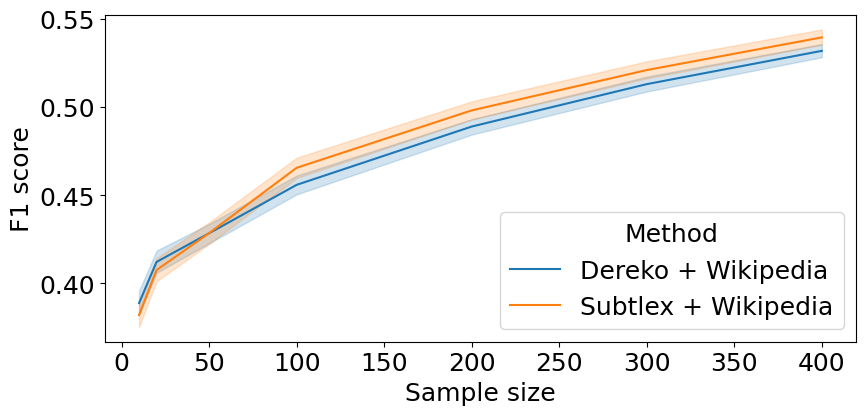

In [12]:
fig, ax = plt.subplots(figsize=(9, 4.5), tight_layout=True)

sns.lineplot(sample_size_results, x="sample_size", y="f1", hue="Method", ax=ax)
ax.set_xlabel("Sample size")
ax.set_ylabel("F1 score")

os.makedirs("figures", exist_ok=True)
plt.savefig("figures/sample_size.pdf")
plt.show()